In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append("../../../Scripts/")

In [4]:
import utils as gb_utils

In [5]:
# this is the setting for plots for research paper and articles.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

# Set the style for seaborn 
plt.style.use(['seaborn-white', 'seaborn-paper'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'
         }

pylab.rcParams.update(**params)

import seaborn as sns
sns.set_context(rc=params)

def stylize_axes(ax, title):
    # removes the top and right lines from the plot rectangle
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
    # Enforce the size of the title, label and tick labels
    #ax.set_xlabel(ax.get_xlabel(), fontsize='medium')
    #ax.set_ylabel(ax.get_ylabel(), fontsize='medium')
    
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium')
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium')
    #ax.set_title(title)
    
def save_image(fig, path):
    fig.tight_layout()
    fig.savefig(path+".png", dpi=300, bbox_inches='tight', transparent=True)
    fig.savefig(path+".pdf", bbox_inches='tight')

def figure_size(fig, size):
    fig.set_size_inches(size)
    fig.tight_layout()

In [6]:
sns.set(font_scale=1.3, style="whitegrid")

In [7]:
n_channels = 3
n_window_len= 128

In [8]:
uci_label_dict = {
    0:'Walking',
    1:'Walking up',
    2:'Walking Down',
    3:'Sitting',
    4:'Standing',
    5:'Lying Down'
}

adl_activity_label_dictionary = {
    0:"Climbing (down)",
    1:"Climbing (up)",
    2:"Running",
    3:"Sitting",
    4:"Standing",
    5:"Walking"
}

mh_label_dict = {
    0:'Standing',
    1:'Sitting',
    2:'Lying Down',
    3:'Walking',
    4:'Climbing Stairs',
    5:'Waist Bend Forward',
    6:'Frontal Elevation Arms',
    7:'Knees Bending',
    8:'Cycling',
    9:'Jogging',
    10:'Running',
    11:'Jump Front & Back'
}

In [9]:
f = open("../Processed data/uci_body_acc_dataset.pickle", "rb")
uci_x, uci_y = pickle.load(f)
f.close()

f = open("../Processed data/mHealth_chest_dataset.pickle", "rb")
mh_x, mh_y = pickle.load(f)
f.close()

f = open("../Processed data/adl_posture_dataset.pickle", "rb")
dl_x, dl_y = pickle.load(f)
f.close()

In [10]:
uci_y_str = [uci_label_dict[r] for r in uci_y]
mh_y_str = [mh_label_dict[r] for r in mh_y]
dl_y_str = [adl_activity_label_dictionary[r] for r in dl_y]

In [11]:
uci_x.shape, mh_x.shape, dl_x.shape

((10299, 128, 3), (4991, 128, 3), (16434, 128, 3))

In [12]:
uci_n_classes = np.max(uci_y) + 1
mh_n_classes = np.max(mh_y) + 1
dl_n_classes = np.max(dl_y) + 1

In [13]:
uci_x = uci_x.ravel().reshape(uci_x.shape[0], n_channels * n_window_len)
mh_x = mh_x.ravel().reshape(mh_x.shape[0], n_channels * n_window_len)
dl_x = dl_x.ravel().reshape(dl_x.shape[0], n_channels * n_window_len)

In [14]:
uci_x.shape, mh_x.shape, dl_x.shape

((10299, 384), (4991, 384), (16434, 384))

In [15]:
from sklearn import manifold
from time import time
import seaborn as sns

# UCI

In [16]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=50,
                    learning_rate = 10.0,
                    n_jobs=-1,
                    n_iter=5000)

uci_t_sne_Y = tsne.fit_transform(uci_x)

In [22]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((uci_t_sne_Y.T, uci_y)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
tsne_df['Class'] = uci_y_str

In [23]:
tsne_df.head()

,Dim_1,Dim_2,label,Class
0,-43.360683,-37.849308,0.0,Walking
1,-30.438643,18.199347,5.0,Lying Down
2,-39.974785,-46.396515,1.0,Walking up
3,56.679134,-17.066284,0.0,Walking
4,-1.758662,55.961971,1.0,Walking up


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


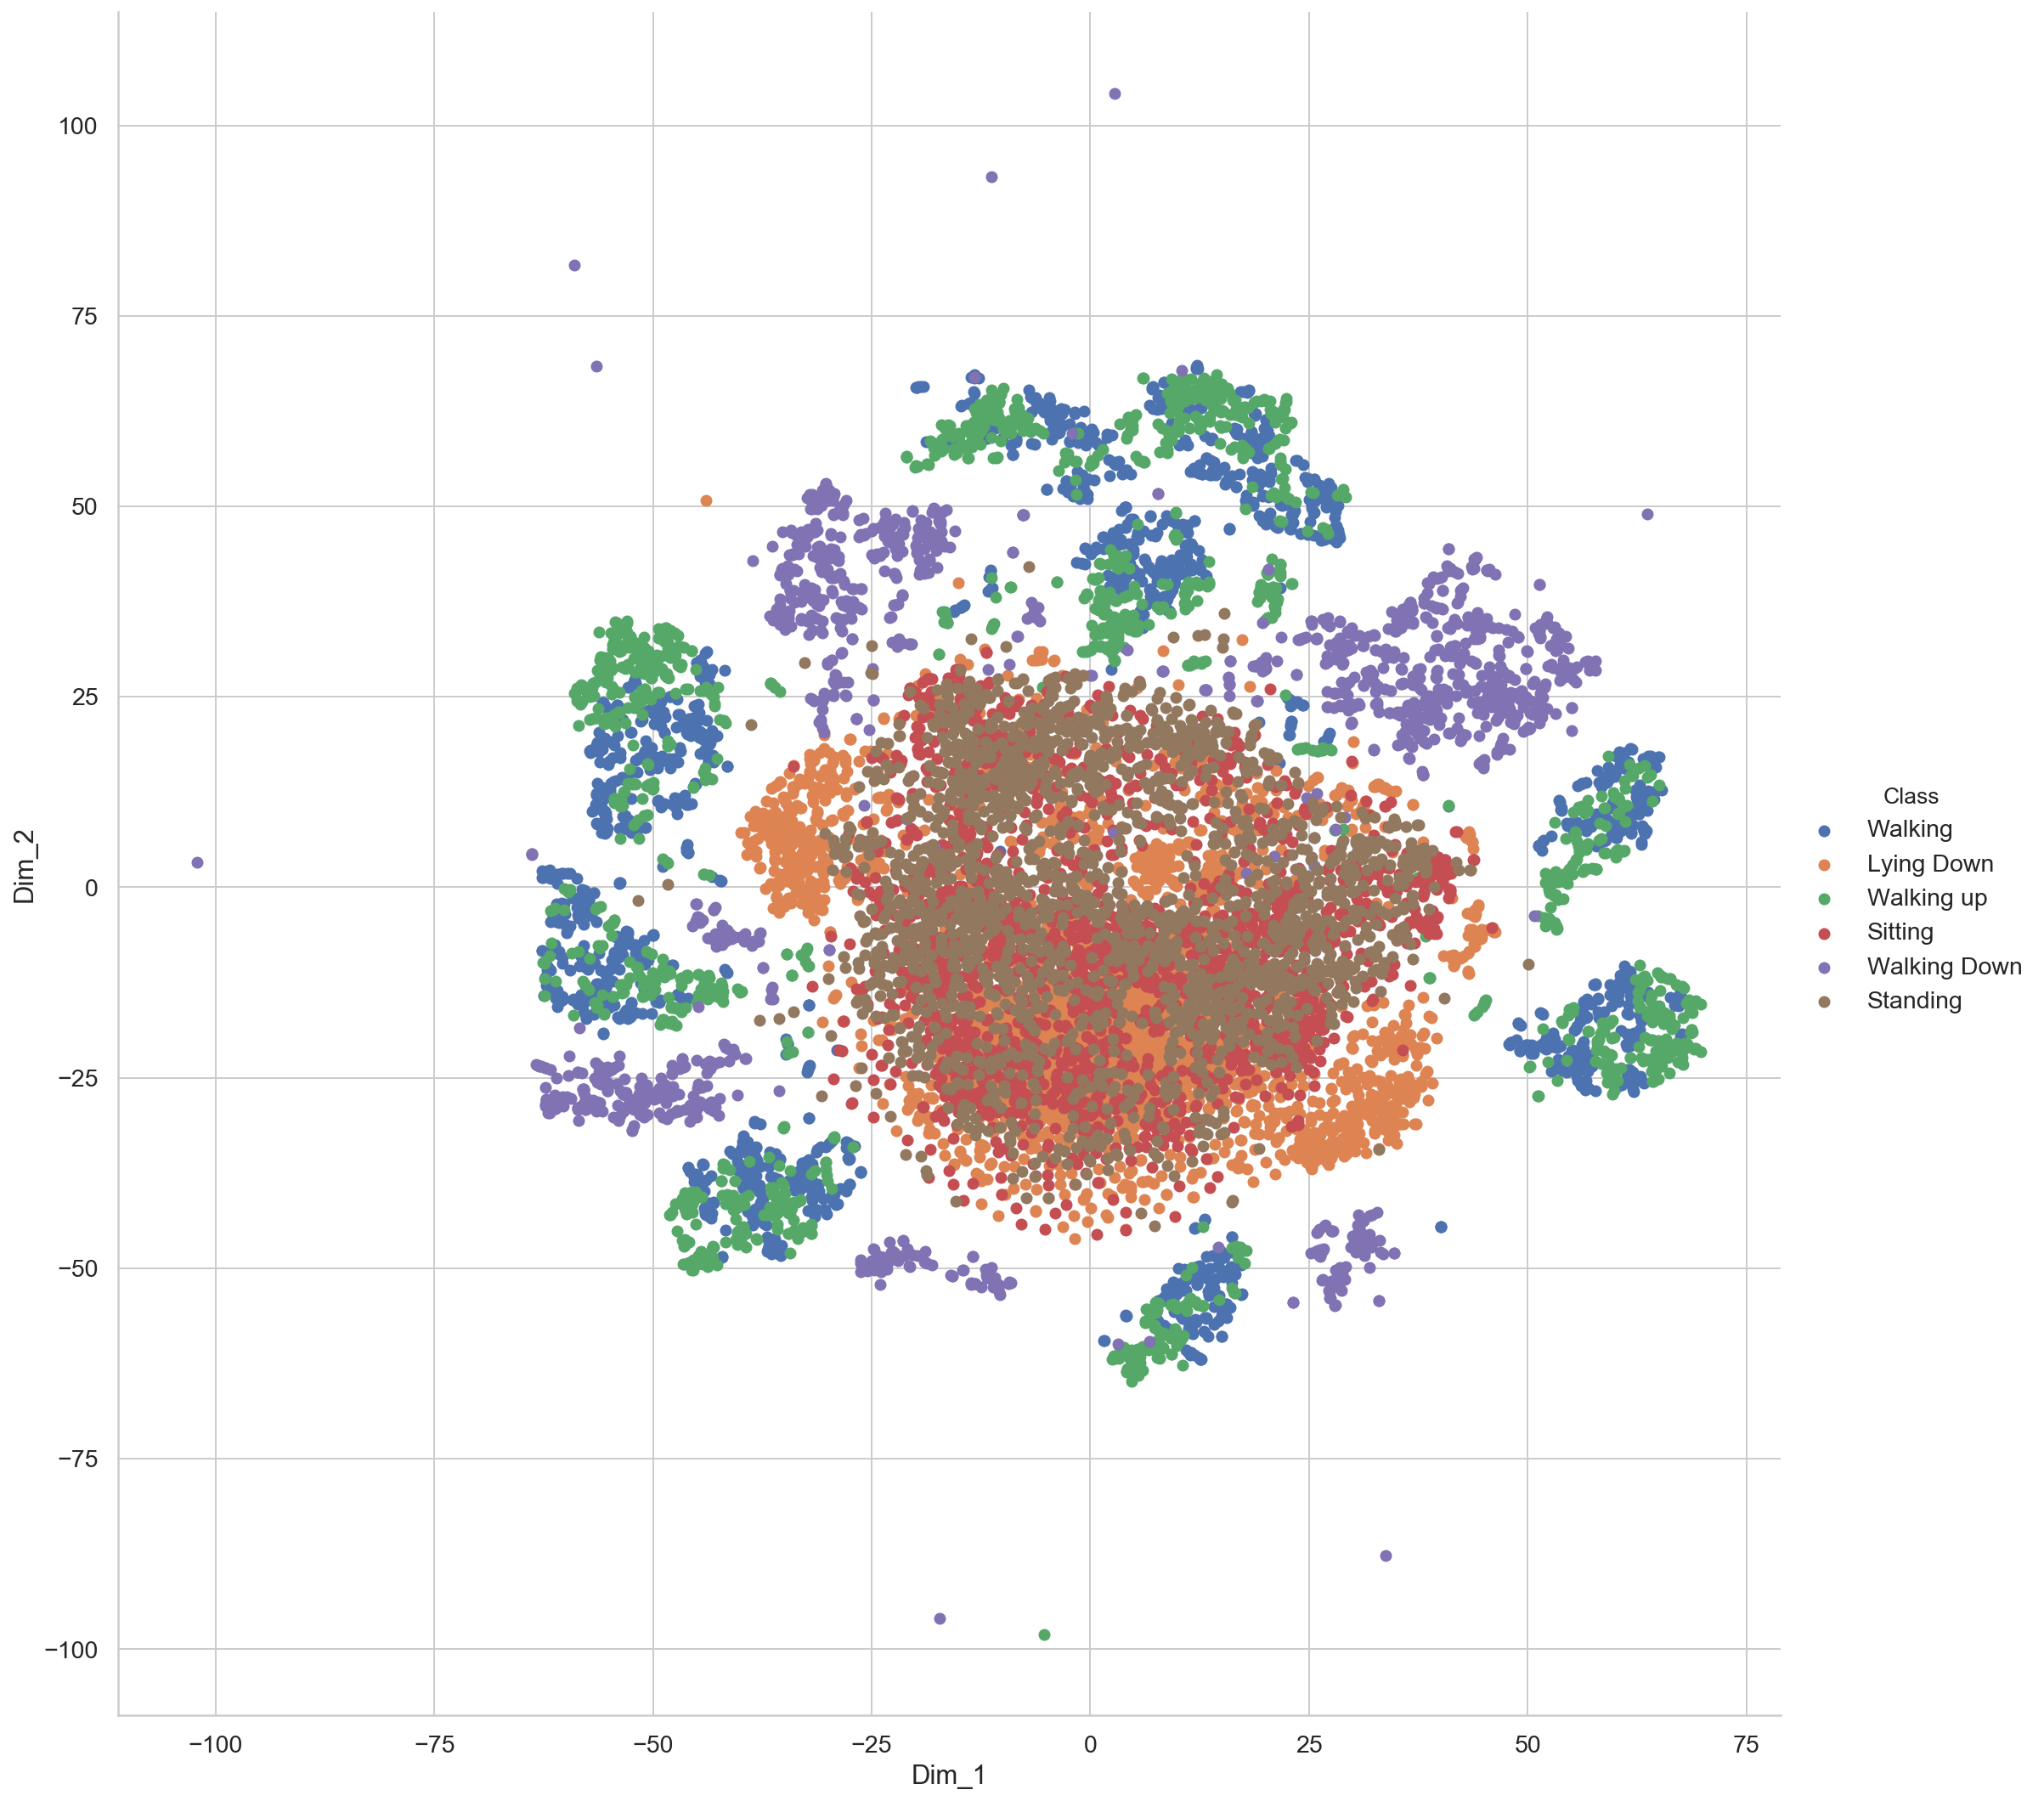

In [24]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=15).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# MHEALTH

In [25]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=50,
                    learning_rate = 10.0,
                    n_jobs=-1,
                    n_iter=5000)

mh_t_sne_Y = tsne.fit_transform(mh_x)

In [26]:
# creating a new data frame which help us in ploting the result data
mh_tsne_data = np.vstack((mh_t_sne_Y.T, mh_y)).T

mh_tsne_df = pd.DataFrame(data=mh_tsne_data, columns=("Dim_1", "Dim_2", "label"))
mh_tsne_df['Class'] = mh_y_str

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


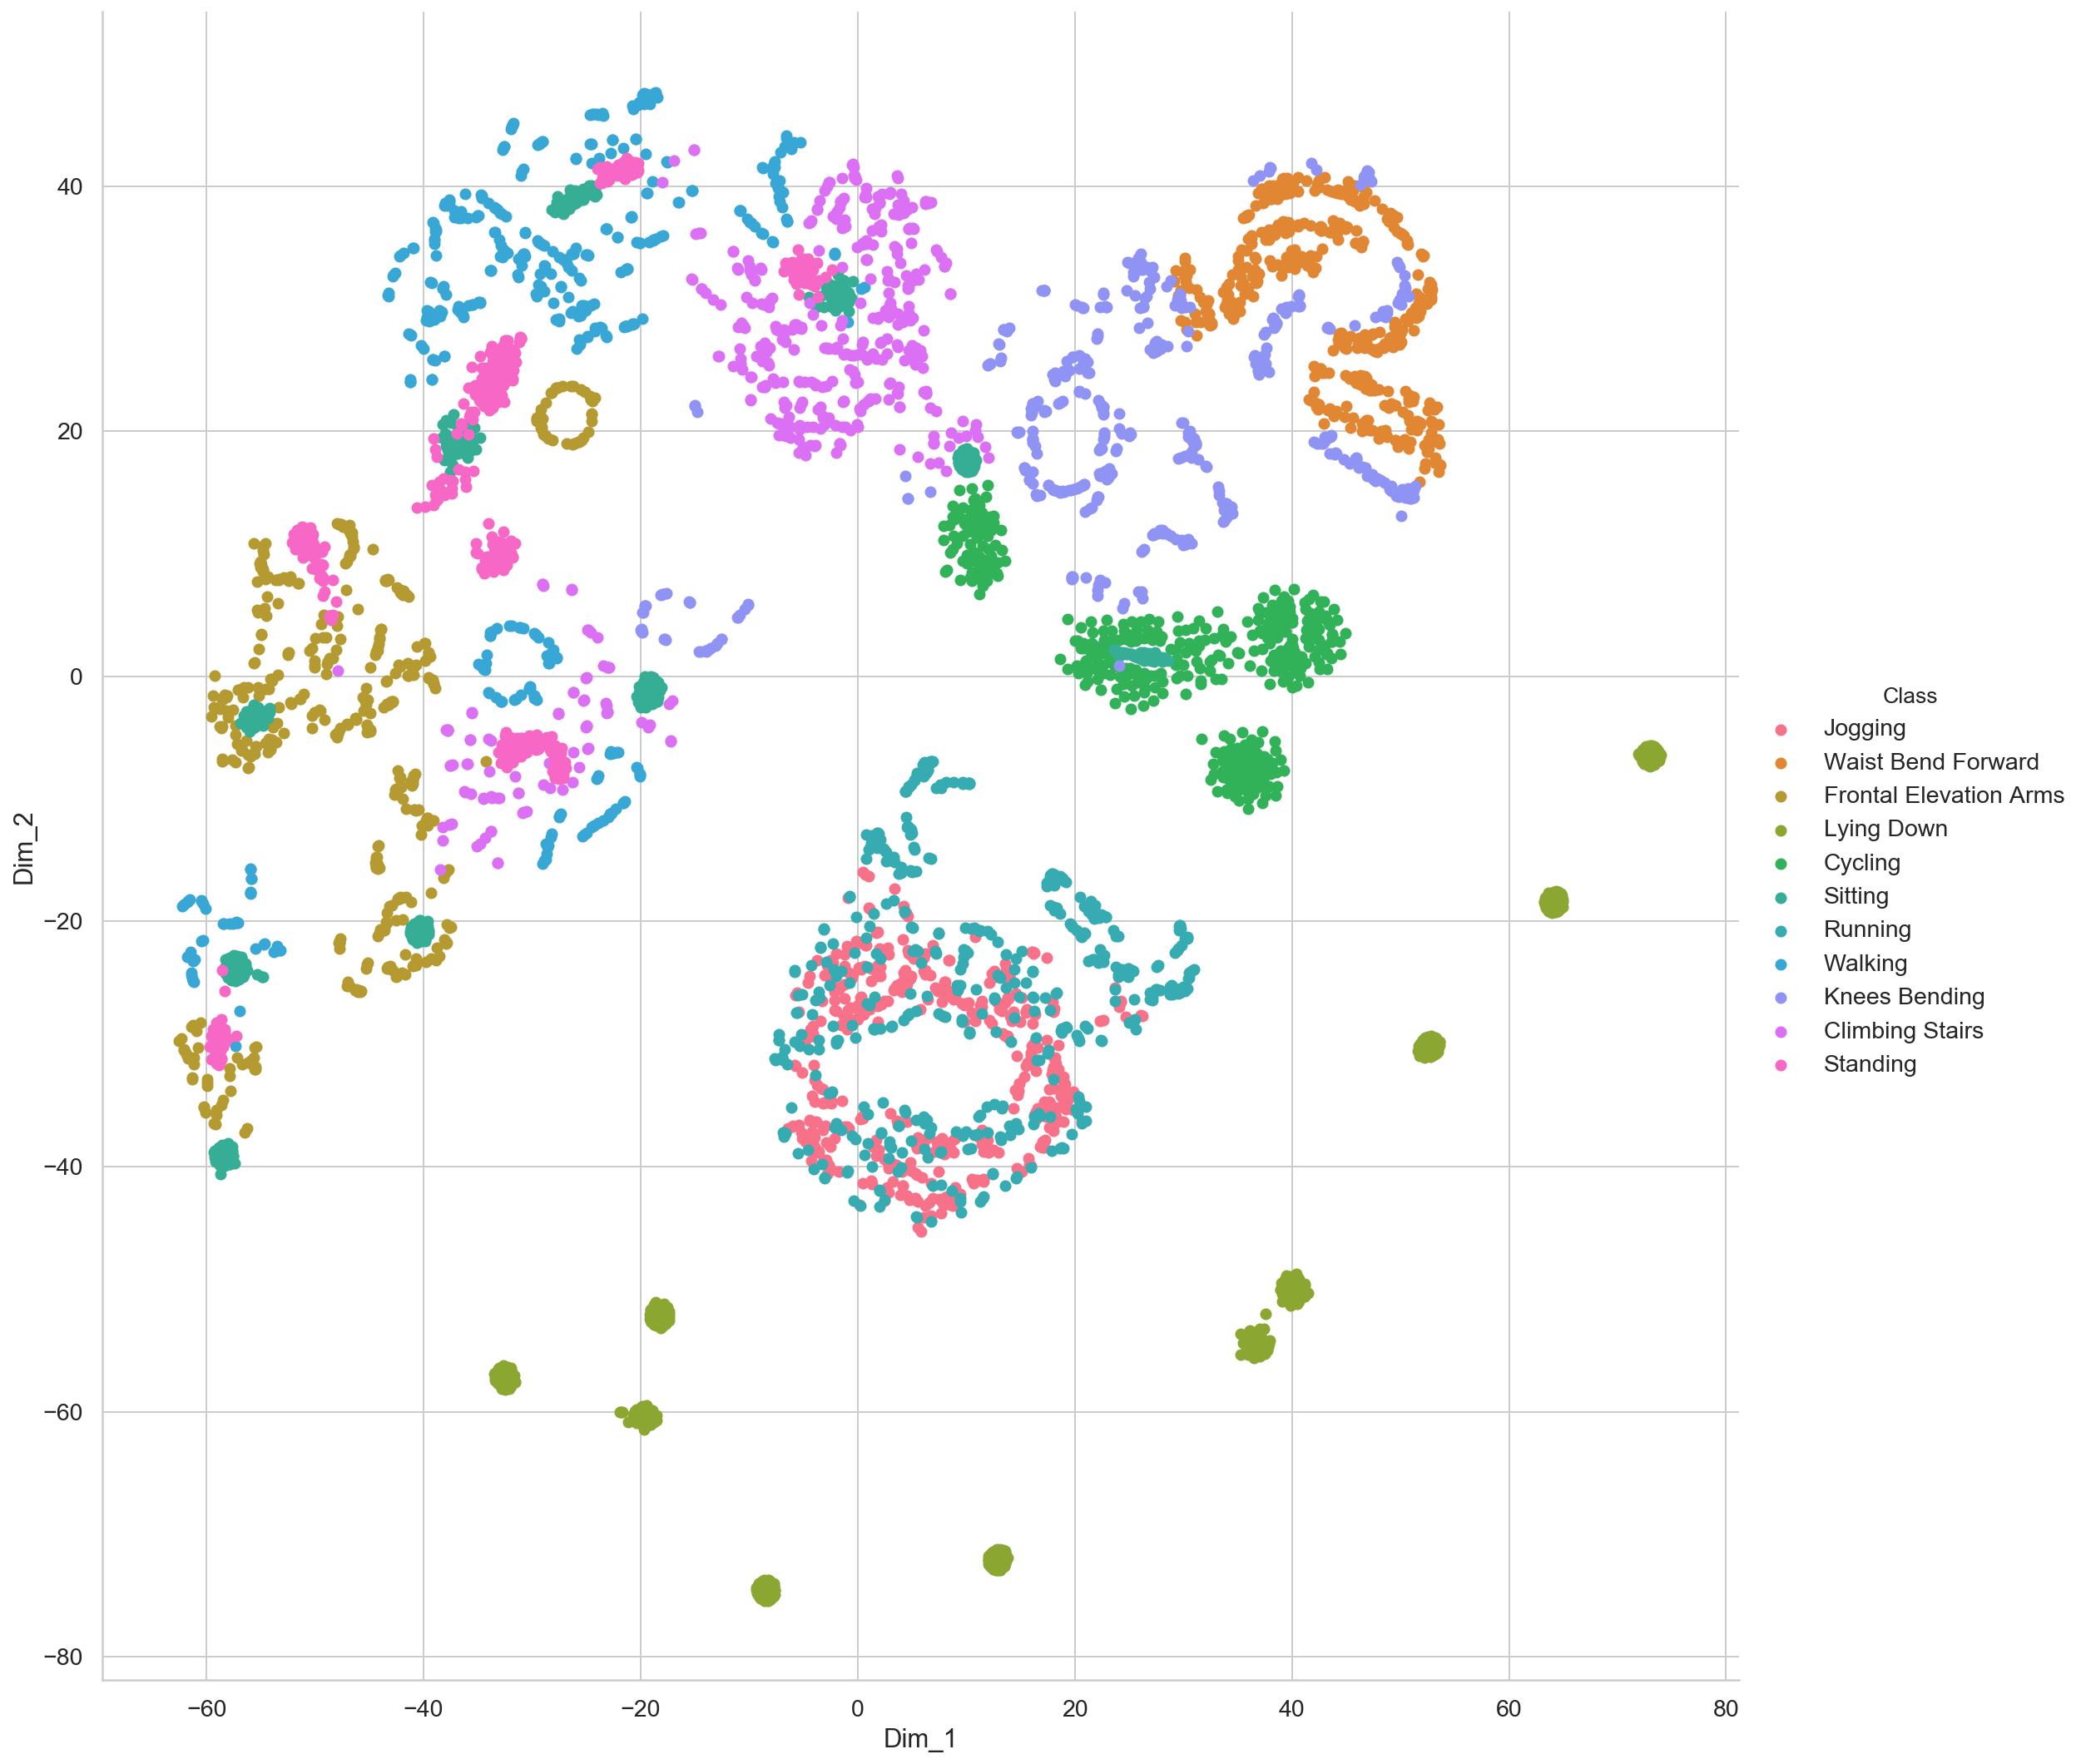

In [27]:
# Ploting the result of tsne
sns.FacetGrid(mh_tsne_df, hue="Class", size=15).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# DL

In [28]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=50,
                    learning_rate = 10.0,
                    n_jobs=-1,
                    n_iter=5000)

dl_t_sne_Y = tsne.fit_transform(dl_x)

In [29]:
# creating a new data frame which help us in ploting the result data
dl_tsne_data = np.vstack((dl_t_sne_Y.T, dl_y)).T

dl_tsne_df = pd.DataFrame(data=dl_tsne_data, columns=("Dim_1", "Dim_2", "label"))
dl_tsne_df['Class'] = dl_y_str

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


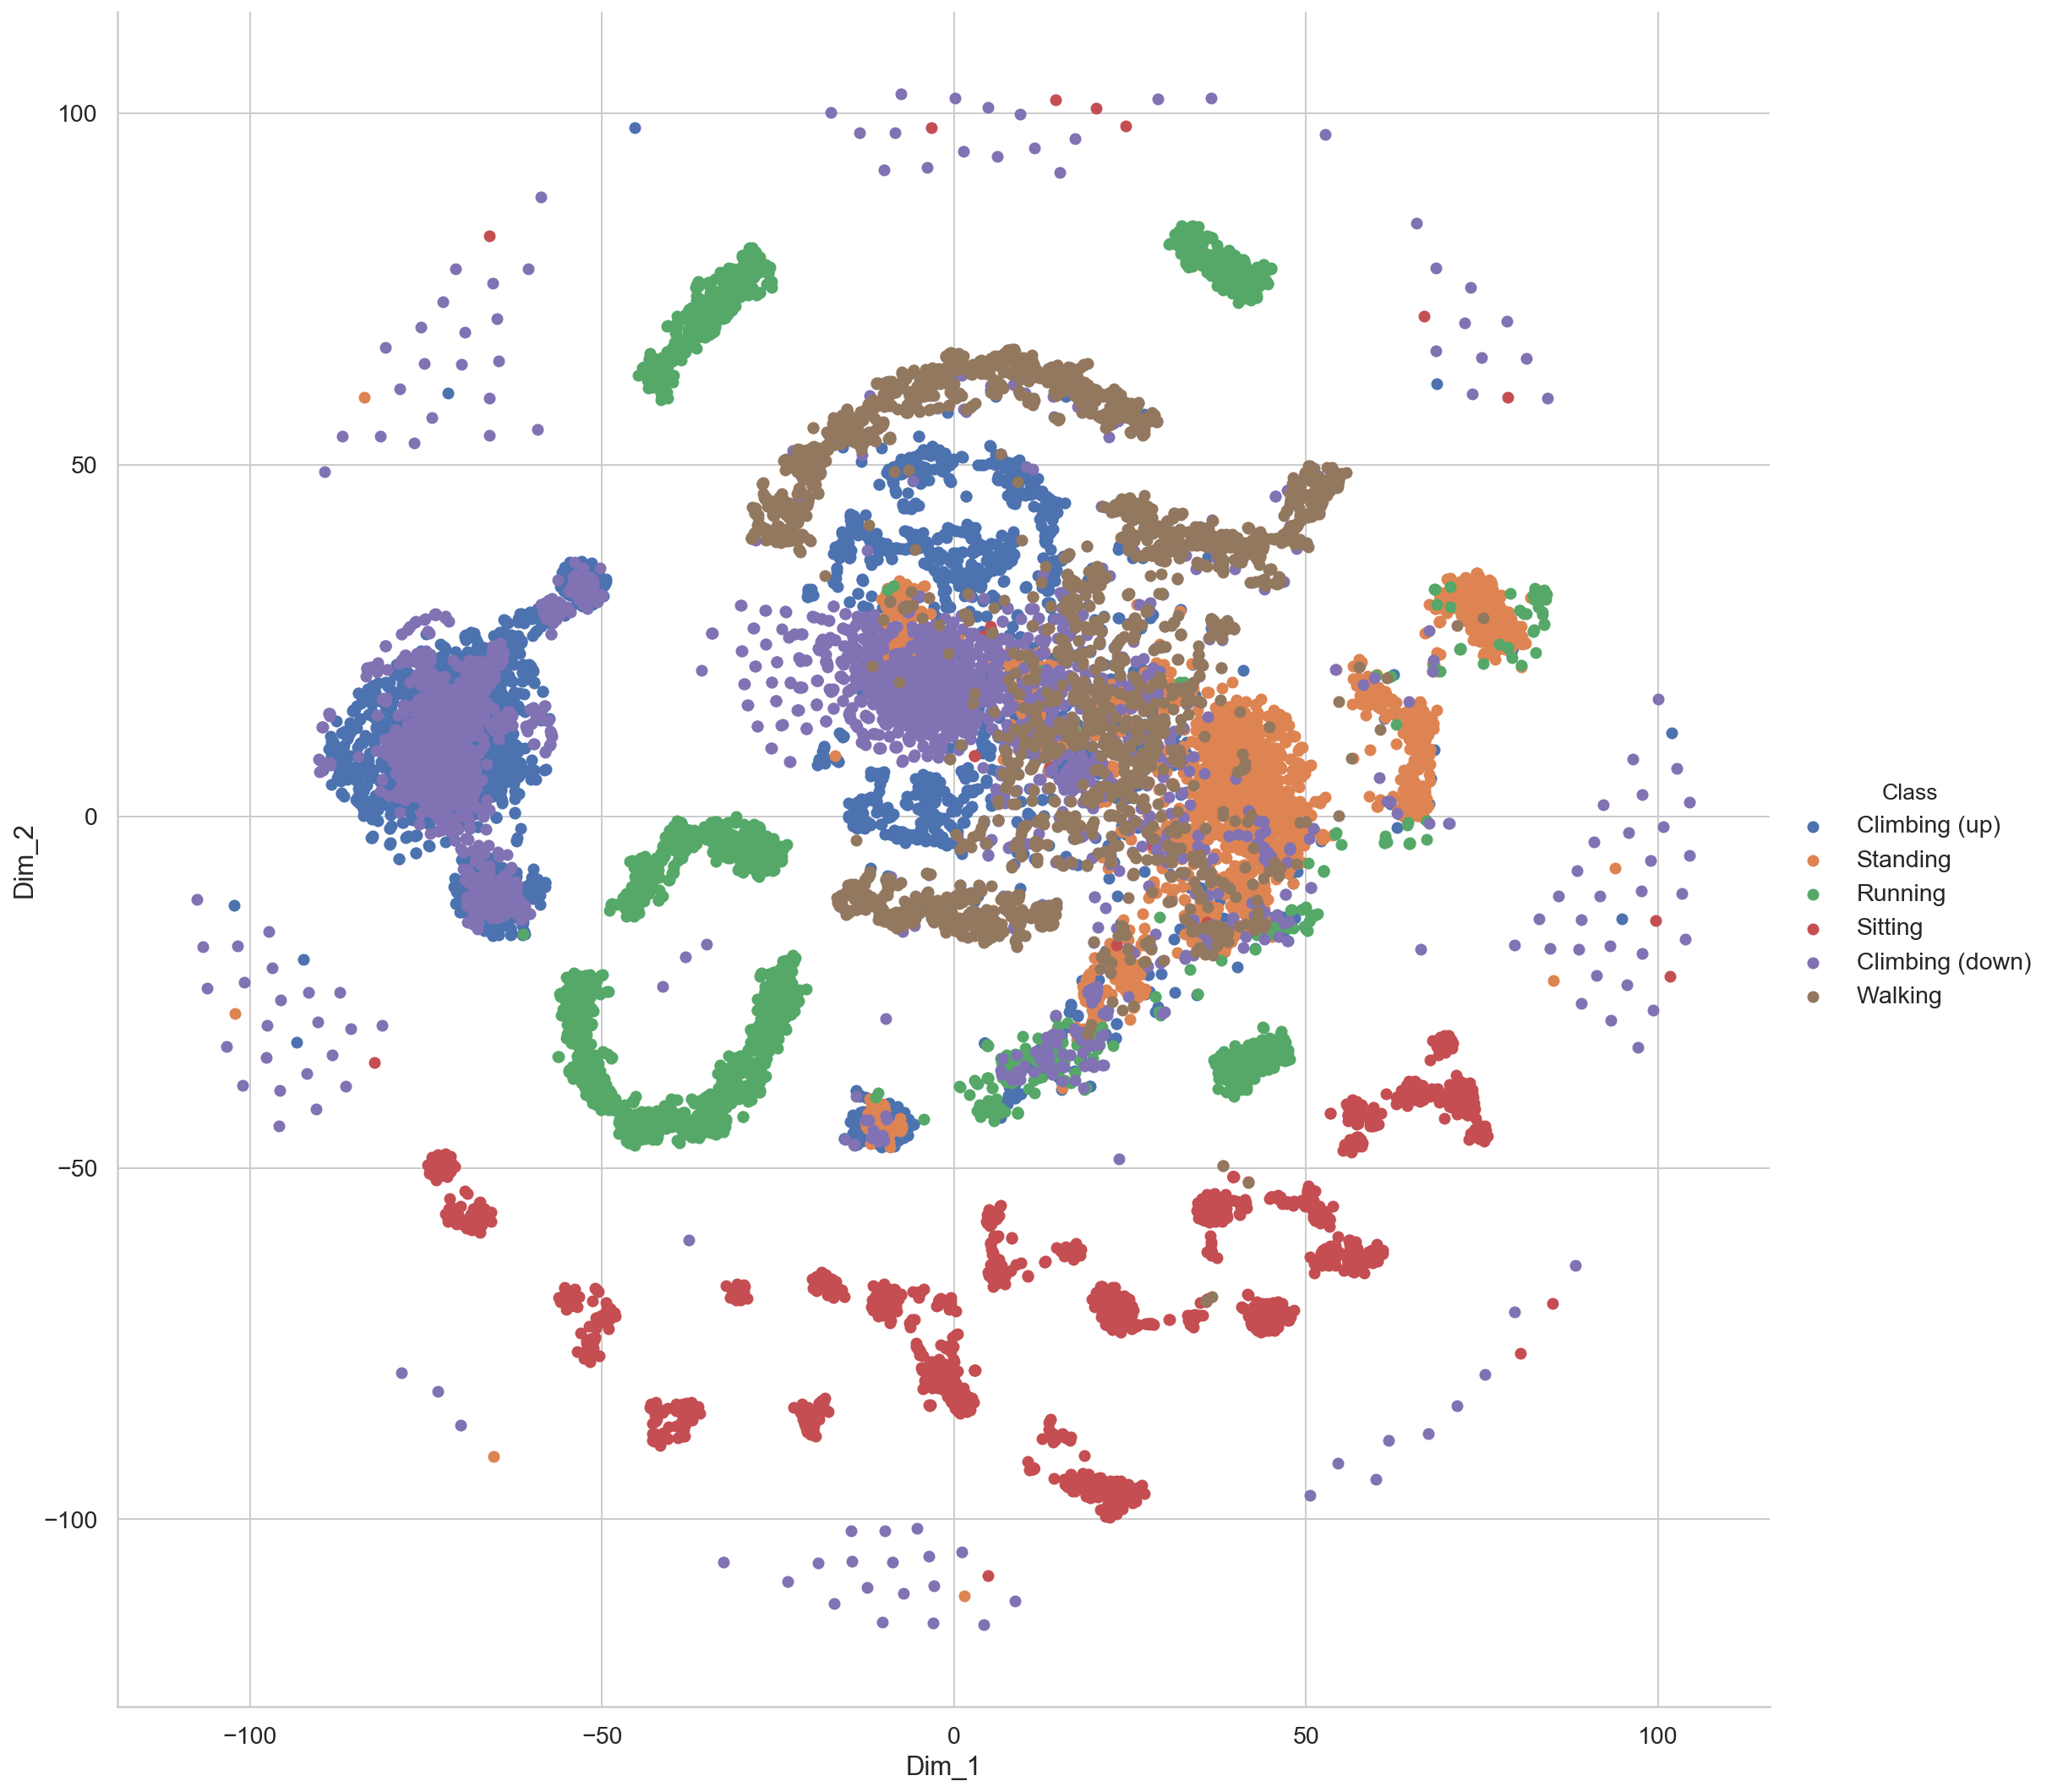

In [30]:
# Ploting the result of tsne
sns.FacetGrid(dl_tsne_df, hue="Class", size=15).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()